In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
### Fetch the data and load it in pandas
data = pd.read_csv('train.csv')
print("Size of the data: ", data.shape)

# See data (five rows) using pandas tools
#print(data.head())

### Prepare input to scikit and train and test cut
binary_data = data[np.logical_or(data['Cover_Type'] == 1,data['Cover_Type'] == 2)] # two-class classification set
X = binary_data.drop('Cover_Type', axis=1).values
y = binary_data['Cover_Type'].values
print(np.unique(y))
y = 2*y-3 # converting labels from [1,2] to [-1,1]

# Split data with scikit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

Size of the data:  (15120, 56)
[1 2]


In [3]:
### Train a single decision tree
clf = DecisionTreeClassifier(max_depth=8)

# Train the classifier and print training time
clf.fit(X_train, y_train)

# Do classification on the test dataset and print classification results
target_names = data['Cover_Type'].unique().astype(str)
target_names.sort()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=data['Cover_Type'].unique().astype(str)))

# Compute accuracy of the classifier (correctly classified instances)
print("Accuracy of the first classifier : {}".format(accuracy_score(y_test, y_pred)))

             precision    recall  f1-score   support

          5       0.74      0.79      0.77       427
          2       0.78      0.73      0.75       437

avg / total       0.76      0.76      0.76       864

Accuracy of the first classifier : 0.7604166666666666


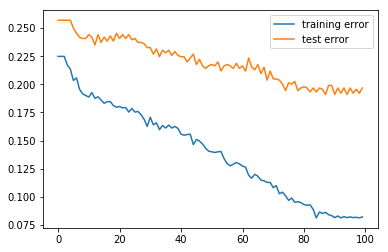

In [14]:
### Train AdaBoost

"""
Your first exercise is to program AdaBoost.
You can call *DecisionTreeClassifier* as above, 
but you have to figure out how to pass the weight vector (for weighted classification) 
to the *fit* function using the help pages of scikit-learn. 
At the end of the loop, compute the training and test errors 
so the last section of the code can plot the lerning curves. 

Once the code is finished, play around with the hyperparameters (D and T), 
and try to understand what is happening.
"""

D = 4 # tree depth
T = 100 # number of trees
w = np.ones(X_train.shape[0]) / X_train.shape[0]
training_scores = np.zeros(X_train.shape[0])
test_scores     = np.zeros(X_test.shape[0])

ts = plt.arange(len(training_scores))
training_errors = []
test_errors     = []

#===============================
# Your code should go here

for t in range(T):
    clf = DecisionTreeClassifier(max_depth=D)
    clf.fit(X_train, y_train, sample_weight=w)
    y_train_pred = clf.predict(X_train)

    I = (y_train_pred != y_train).astype(int)
    num = w@I # Vector multiplication
    den = sum(w)
    gamma = num/den
    alpha = np.log((1-gamma)/gamma)
    w *= np.exp(alpha*I) 

    training_scores += alpha * y_train_pred
    training_error = 1. * len(training_scores[training_scores * y_train < 0]) / len(X_train)
    y_pred = clf.predict(X_test)
    test_scores += alpha * y_pred
    test_error = 1. * len(test_scores[test_scores * y_test < 0]) / len(X_test)

    training_errors.append(training_error)
    test_errors.append(test_error)

plt.plot(training_errors, label="training error")
plt.plot(test_errors, label="test error")
plt.legend()
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24


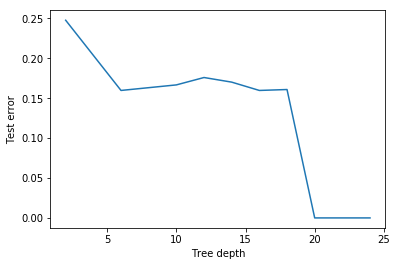

In [17]:
### Optimize AdaBoost


""" Your final exercise is to optimize the tree depth in AdaBoost. 
Copy-paste your AdaBoost code into a function,
and call it with different tree depths,
and for simplicity with T = 100 iterations (number of trees).
Plot the final test error vs the tree depth. Discuss the plot.
"""

#===============================

# Your code should go here

def AdaBoost(D, T):
    w = np.ones(X_train.shape[0]) / X_train.shape[0]
    training_scores = np.zeros(X_train.shape[0])      # N.B. training prediction (without sign fn)
    test_scores = np.zeros(X_test.shape[0])           # N.B. test predictio (without sign fn)

    ts = plt.arange(len(training_scores))

    for t in range(T):
        clf = DecisionTreeClassifier(max_depth=D)
        clf.fit(X_train, y_train, sample_weight=w)
        y_train_pred = clf.predict(X_train)

        I = (y_train_pred != y_train).astype(int)
        num = w@I # Vector multiplication
        den = sum(w)
        gamma = num/den
        alpha = np.log((1-gamma)/gamma)
        w *= np.exp(alpha*I) 

        training_scores += alpha * y_train_pred
        training_error = 1. * len(training_scores[training_scores * y_train < 0]) / len(X_train)
        y_test_pred = clf.predict(X_test)
        test_scores += alpha * y_test_pred
        test_error = 1. * len(test_scores[test_scores * y_test < 0]) / len(X_test)

        plt.clf()

    return test_error



Ds = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
final_test_errors = []
for D in Ds:
    print(D)
    final_test_errors.append(AdaBoost(D, 100))


plt.plot(Ds, final_test_errors)
plt.ylabel("Test error")
plt.xlabel("Tree depth")
plt.show()

#===============================